In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from scipy.stats import zscore


BENIN DATA ANALYSIS

In [2]:
togo_data = pd.read_csv("dataset/togo-dapaong_qc.csv")  
togo_data.shape

(525600, 19)

In [3]:
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
summary_stats = togo_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         

In [5]:
togo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
numeric_df= togo_data.select_dtypes(include='number')
negative_columns = numeric_df.columns[(numeric_df<0).any()]
print("columns with negative values are:",negative_columns)
negative_count = (numeric_df < 0).sum()
print("sum of negative values in each numeric columns:")
print(negative_count)

columns with negative values are: Index(['GHI'], dtype='object')
sum of negative values in each numeric columns:
GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [7]:

for column in ['GHI', 'DNI', 'DHI']:
    print(togo_data[togo_data[column] < 0][column].describe())


count    257385.000000
mean         -2.376459
std           1.166121
min         -12.700000
25%          -3.200000
50%          -2.200000
75%          -1.500000
max          -0.100000
Name: GHI, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DNI, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: DHI, dtype: float64


In [8]:
# Check for outliers (e.g., in GHI, DNI, DHI)
outliers =togo_data[(togo_data['GHI'] < 0) | (togo_data['DNI'] < 0) | (togo_data['DHI'] < 0)]
print("Outliers:\n", outliers)

Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDst

In [9]:
# Convert Timestamp to datetime
togo_data['Timestamp'] = pd.to_datetime(togo_data['Timestamp'])

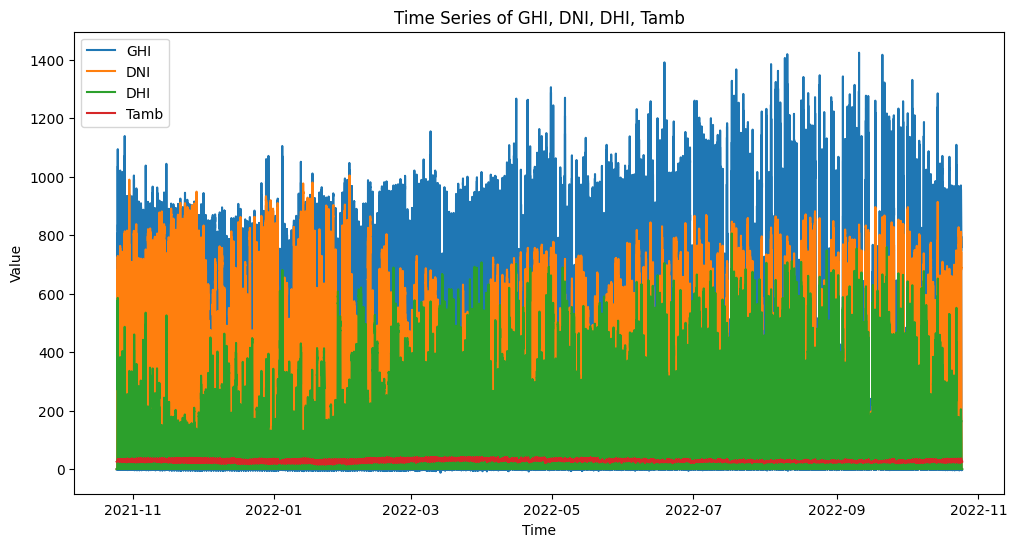

In [10]:
# Plot time series for GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
plt.plot(togo_data['Timestamp'], togo_data['GHI'], label='GHI')
plt.plot(togo_data['Timestamp'], togo_data['DNI'], label='DNI')
plt.plot(togo_data['Timestamp'], togo_data['DHI'], label='DHI')
plt.plot(togo_data['Timestamp'], togo_data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.show()

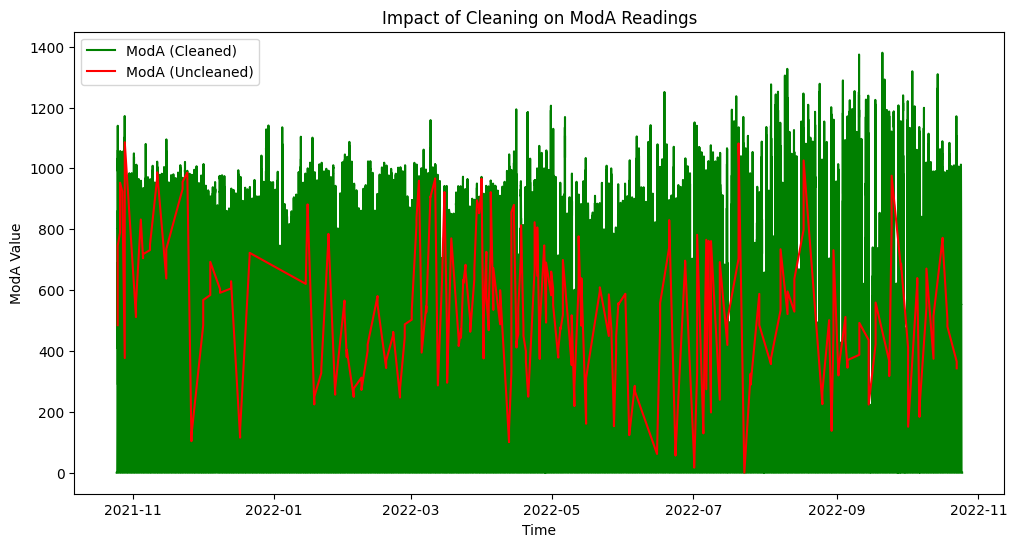

In [12]:
# Compare ModA and ModB readings before and after cleaning
cleaned_data = togo_data[togo_data['Cleaning'] == 0]
uncleaned_data = togo_data[togo_data['Cleaning'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
plt.xlabel('Time')
plt.ylabel('ModA Value')
plt.title('Impact of Cleaning on ModA Readings')
plt.legend()
plt.show()

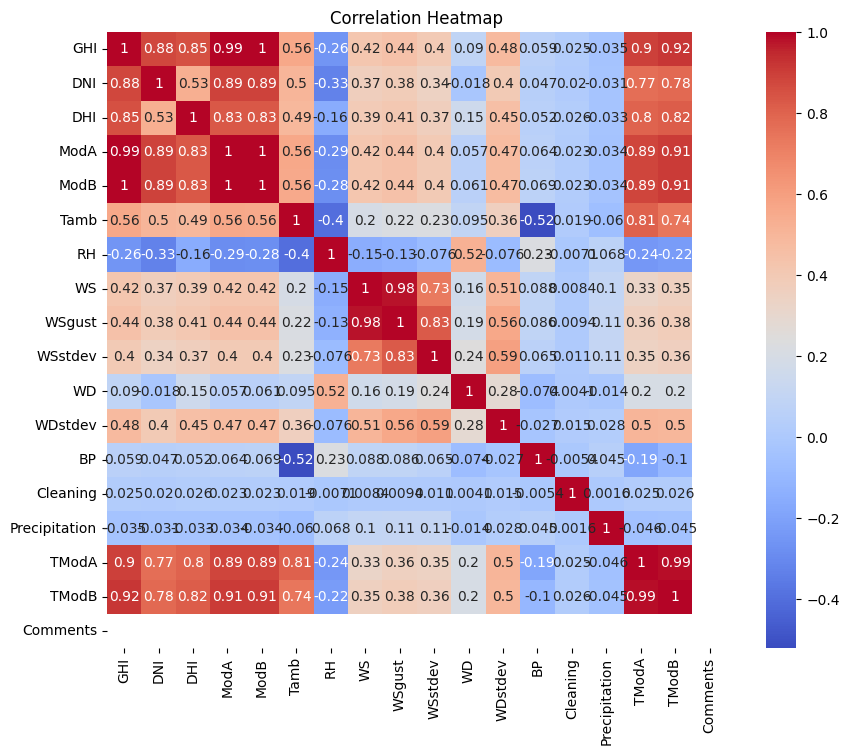

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = togo_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_4737/138162779.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(togo_data['WD'] * np.pi / 180, togo_data['WS'],togo_data['WSgust'], cmap=cm.viridis, alpha=0.75)


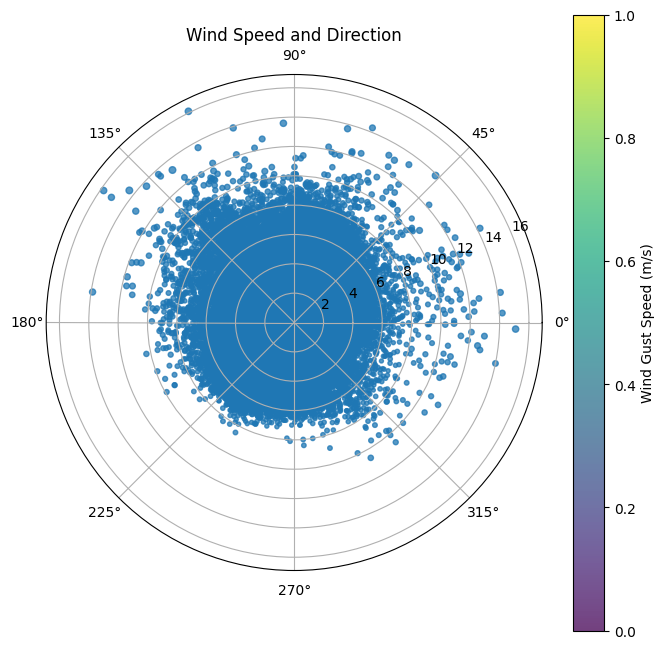

In [15]:
# Polar plot for wind speed and direction

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(togo_data['WD'] * np.pi / 180, togo_data['WS'],togo_data['WSgust'], cmap=cm.viridis, alpha=0.75)
plt.colorbar(label='Wind Gust Speed (m/s)')
plt.title('Wind Speed and Direction')
plt.show()

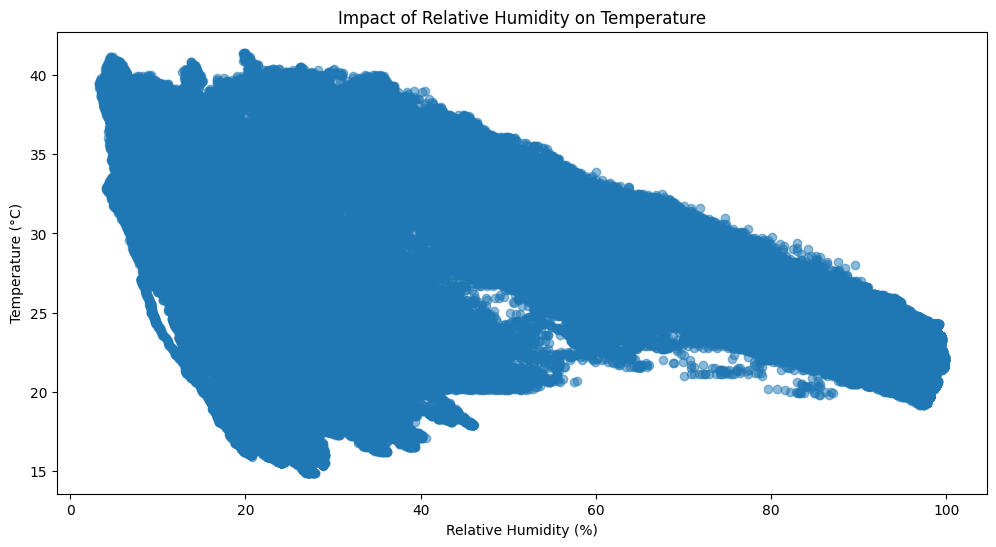

In [16]:
# Scatter plot to explore the influence of RH on temperature
plt.figure(figsize=(12, 6))
plt.scatter(togo_data['RH'],togo_data['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Impact of Relative Humidity on Temperature')
plt.show()

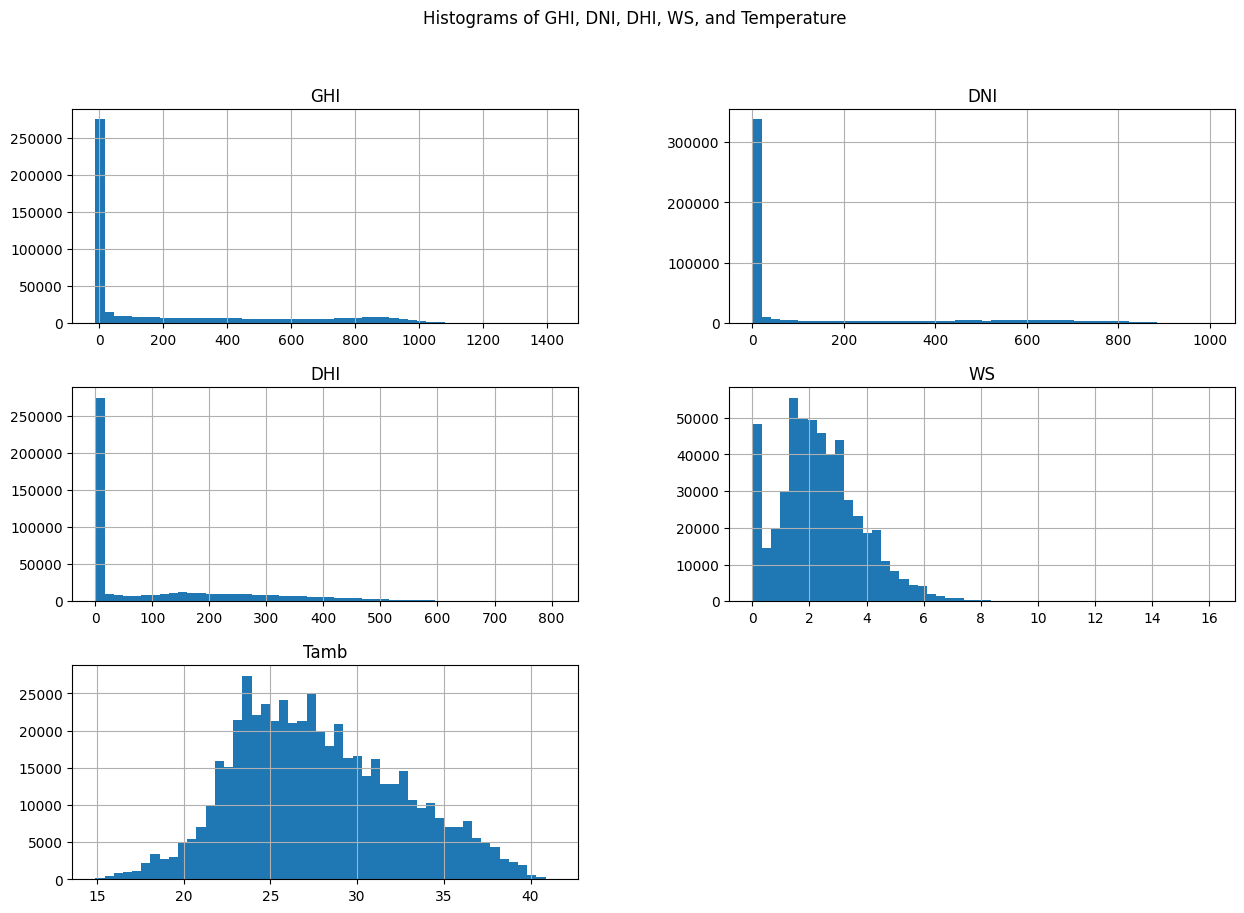

In [17]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
togo_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
plt.show()

In [18]:
# Z-Score Analysis
togo_data['GHI_zscore'] = zscore(togo_data['GHI'])
zscore_outliers =togo_data[togo_data['GHI_zscore'].abs() > 3]
print("Z-Score Outliers:\n", zscore_outliers)

Z-Score Outliers:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
248417 2022-04-15 12:18:00  1223.0  615.1  597.3  1154.0  1123.0  35.4  45.1   
248418 2022-04-15 12:19:00  1267.0  666.5  593.3  1194.0  1164.0  35.3  45.3   
248419 2022-04-15 12:20:00  1243.0  652.7  578.6  1167.0  1137.0  35.4  45.1   
248423 2022-04-15 12:24:00  1234.0  632.0  589.4  1156.0  1125.0  35.2  45.5   
248425 2022-04-15 12:26:00  1263.0  653.3  602.0  1185.0  1154.0  35.3  45.8   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
510410 2022-10-14 10:51:00  1221.0  811.8  450.7  1255.3  1237.0  29.9  70.1   
510412 2022-10-14 10:53:00  1285.0  862.8  460.8  1309.4  1290.0  30.1  67.8   
510413 2022-10-14 10:54:00  1202.0  748.9  494.9  1242.3  1225.0  30.1  68.0   
510414 2022-10-14 10:55:00  1267.0  790.9  514.5  1299.4  1280.0  30.1  68.6   
510416 2022-10-14 10:57:00  1214.0  699.2  542.7  1244.3  1226.0  30.3  69.2   

         WS  WSgust 

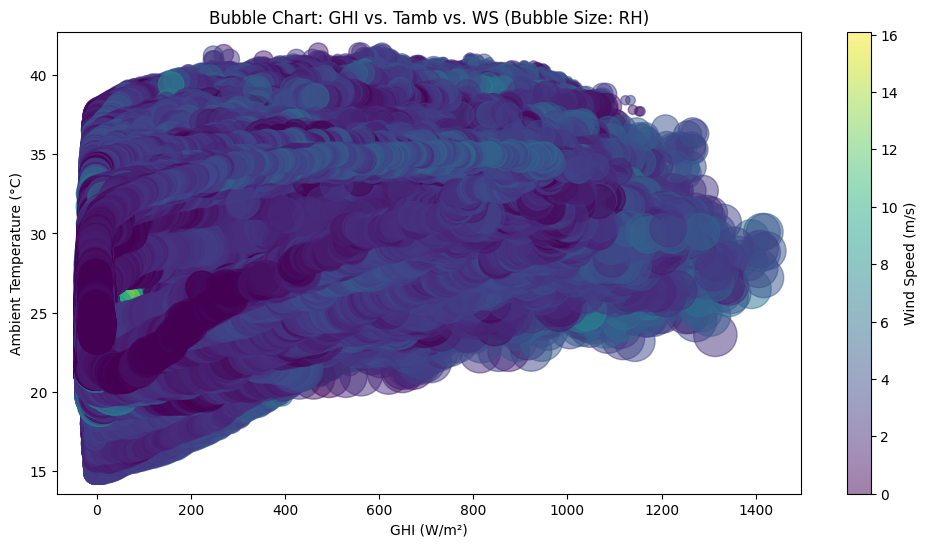

In [19]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(togo_data['GHI'], togo_data['Tamb'], s= togo_data['RH']*10, alpha=0.5, c=togo_data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
plt.show()

In [20]:
# Handle wrong values 

In [21]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    # Calculate the 75th percentile for negative values
    negative_values = togo_data[togo_data[column] < 0][column]
    if not negative_values.empty:  
        p75 = abs(negative_values.describe()['75%'])  # Get the absolute 75th percentile value
        
        # Replace the negative values with the absolute 75th percentile value
        togo_data.loc[togo_data[column] < 0, column] = p75
        
        print(f"Replaced negative values in '{column}' with {p75}")
    else:
        print(f"No negative values found in '{column}'")



Replaced negative values in 'GHI' with 1.5
No negative values found in 'DNI'
No negative values found in 'DHI'


In [22]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    if (togo_data[column] < 0).any():
        print(f"Negative values still present in '{column}'.")
    else:
        print(f"No negative values in '{column}'.")


No negative values in 'GHI'.
No negative values in 'DNI'.
No negative values in 'DHI'.


In [24]:
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,GHI_zscore
0,2021-10-25 00:01:00,1.5,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN,-0.718859
1,2021-10-25 00:02:00,1.5,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN,-0.718859
2,2021-10-25 00:03:00,1.5,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN,-0.718859
3,2021-10-25 00:04:00,1.5,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN,-0.718549
4,2021-10-25 00:05:00,1.5,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN,-0.718549
